In [11]:
import numpy as np, pandas as pd
from glob import glob
from astropy.table import Table
from matplotlib import pyplot as plt, colors as colors, colorbar as cbar
from astroquery.simbad import Simbad
import astropy.coordinates as coord
import astropy.units as u
from WISE_tools import *

%matplotlib inline

In [2]:
good = pd.read_csv('../data/bright_sample/massive.csv.gz')
len(good)

6484

In [3]:
lightcurve_directory = '../data/WISE_lcs/'
source_names = parse_source_names(lightcurve_directory)
print(source_names[4],len(source_names))

J000536.97+432405.0 6484


/Users/carina/Research/UW/GaiaSprintMassive/WISE/code/WISE_tools.py:81: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat(dfs)


96 4302.000004188002 45.28421057040002 0.1104999999999996 4.782183058834947 WISE J000536.97+432405.0


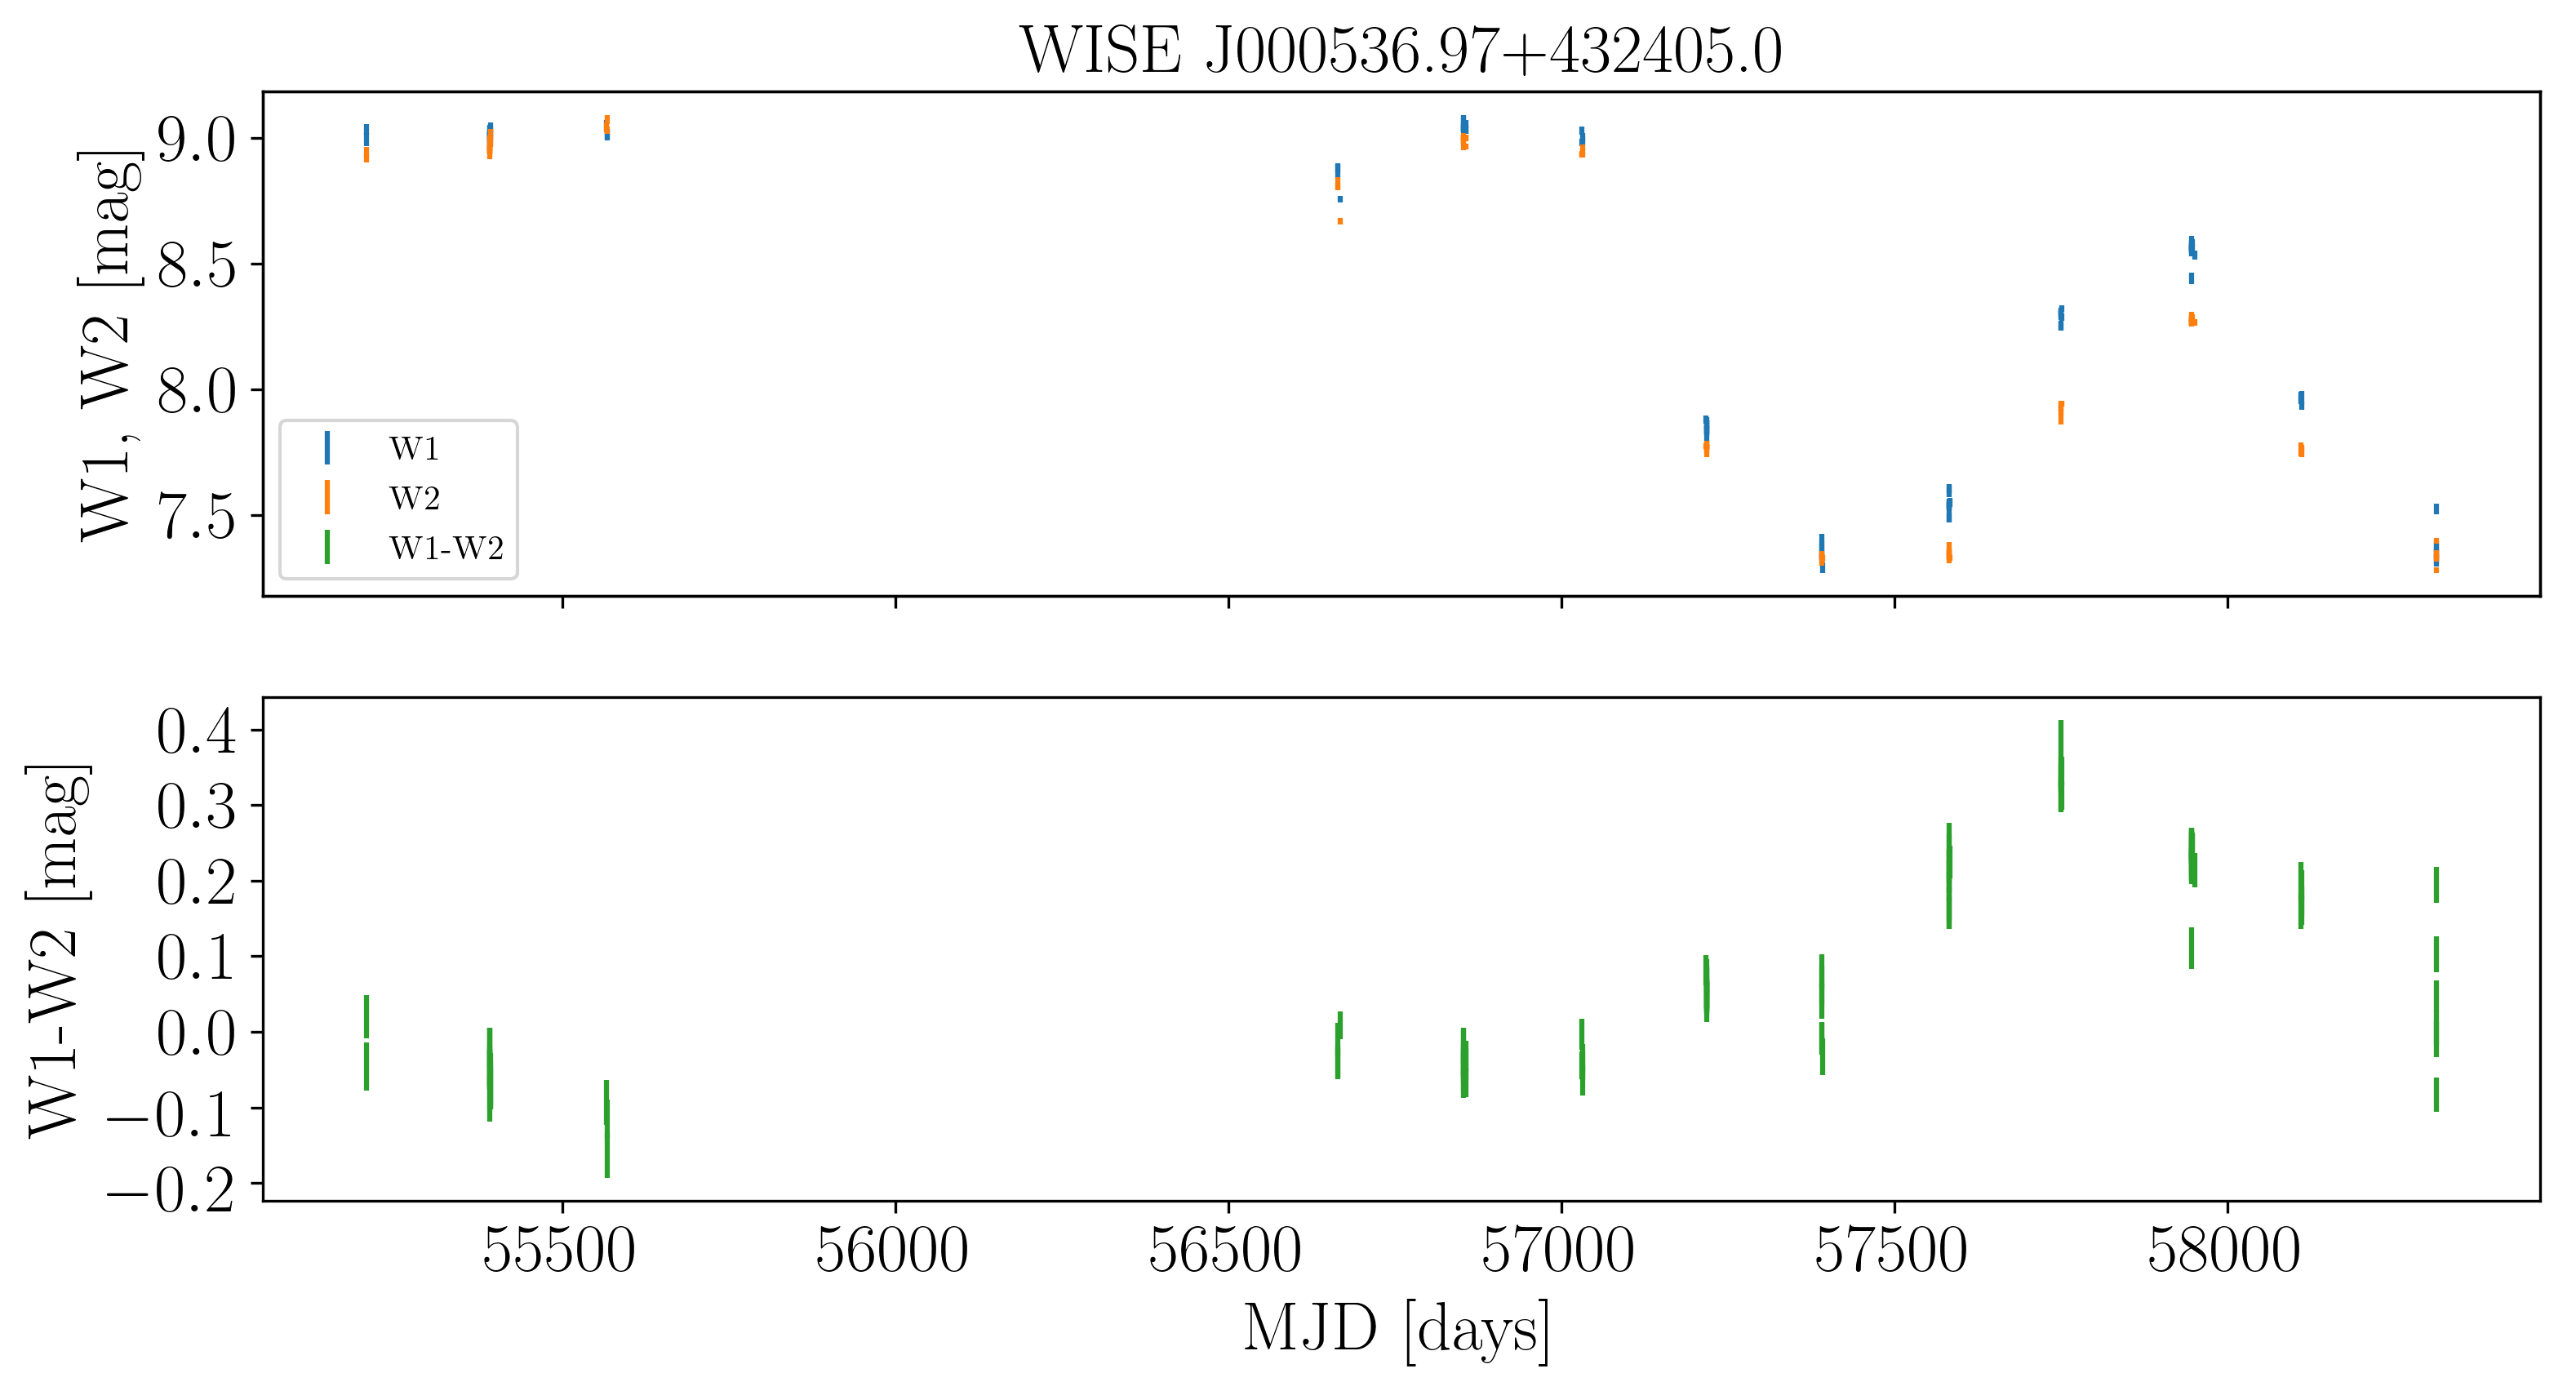

In [4]:
#An illustrative example
lc = get_lightcurve(source_names[4],lightcurve_directory)
fig,ax = plt.subplots(2,1,figsize=(12,6),dpi=300,sharex=True)
twax = ax[0].twinx()
N = len(lc)
chi2 = np.sum(((lc['w1w2'].values - np.median(lc['w1w2'].values))**2.0)/(lc['w1w2err'].values**2.0))
redchi2 = chi2/(N-1.0)
MAD = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values)))
EWM = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values))/lc['w1w2err'].values)
ax[0].errorbar(lc['mjd'],lc['w1mpro'],yerr=lc['w1sigmpro'],c='C0',ls='',label='W1')
twax.errorbar(lc['mjd'],lc['w2mpro'],yerr=lc['w2sigmpro'],c='C1',ls='',label='W2')
twax.set_yticks([])
ax[1].errorbar(lc['mjd'],lc['w1w2'],yerr=lc['w1w2err'],c='C2',ls='',label='W1-W2')
h1, l1 = ax[0].get_legend_handles_labels()
h2, l2 = twax.get_legend_handles_labels()
h3, l3 = ax[1].get_legend_handles_labels()
ax[0].legend(h1+h2+h3, l1+l2+l3,loc='lower left')
ax[1].set_xlabel('MJD [days]',fontsize=20)
ax[0].set_ylabel('W1, W2 [mag]', fontsize=20)
ax[0].set_title('WISE J000536.97+432405.0', fontsize=20)
ax[1].set_ylabel('W1-W2 [mag]',fontsize=20)
for a in ax:
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
for tick in twax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
print(N,chi2,redchi2,MAD,EWM,'WISE '+source_names[4])
plt.savefig('../plots/ex_lc.pdf')

```python
Ns = []
w1_chi2s = []
w1_chi2reds = []
w1_logchis = []
w1_MADs = []
w1_EWMs = []
w1_logEs = []
w2_chi2s = []
w2_chi2reds = []
w2_logchis = []
w2_MADs = []
w2_EWMs = []
w2_logEs = []
color_chi2s = []
color_chi2reds = []
color_logchis = []
color_MADs = []
color_EWMs = []
color_logEs = []

from tqdm.notebook import tqdm
for name in tqdm(source_names):
    lc = get_lightcurve(name,lightcurve_directory)
    full_lc = get_lightcurve(name,lightcurve_directory,clean=False)
    N_full = len(full_lc)
    if N_full == 0:
        print('WISE '+name)
    N = len(lc)
    if N in [0,1]:
        w1_chi2 = np.nan
        w1_chi2red = np.nan
        w1_logchi = np.nan
        w1_MAD = np.nan
        w1_EWM = np.nan
        w1_logE = np.nan
        w2_chi2 = np.nan
        w2_chi2red = np.nan
        w2_logchi = np.nan
        w2_MAD = np.nan
        w2_EWM = np.nan
        w2_logE = np.nan
        color_chi2 = np.nan
        color_chi2red = np.nan
        color_logchi = np.nan
        color_MAD = np.nan
        color_EWM = np.nan
        color_logE = np.nan
    else:
        w1_chi2 = np.sum(((lc['w1mpro'].values - np.median(lc['w1mpro'].values))/lc['w1sigmpro'].values)**2.0)
        w1_chi2red = w1_chi2/(N-1.0)
        w1_logchi = np.log10(w1_chi2red)
        w1_MAD = np.median(np.abs(lc['w1mpro'].values-np.median(lc['w1mpro'].values)))
        w1_EWM = np.median(np.abs(lc['w1mpro'].values-np.median(lc['w1mpro'].values))/lc['w1sigmpro'].values)
        w1_logE = np.log10(w1_EWM)
        w2_chi2 = np.sum(((lc['w2mpro'].values - np.median(lc['w2mpro'].values))/lc['w2sigmpro'].values)**2.0)
        w2_chi2red = w2_chi2/(N-1.0)
        w2_logchi = np.log10(w2_chi2red)
        w2_MAD = np.median(np.abs(lc['w2mpro'].values-np.median(lc['w2mpro'].values)))
        w2_EWM = np.median(np.abs(lc['w2mpro'].values-np.median(lc['w2mpro'].values))/lc['w2sigmpro'].values)
        w2_logE = np.log10(w2_EWM)
        color_chi2 = np.sum(((lc['w1w2'].values - np.median(lc['w1w2'].values))/lc['w1w2err'].values)**2.0)
        color_chi2red = color_chi2/(N-1.0)
        color_logchi = np.log10(color_chi2red)
        color_MAD = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values)))
        color_EWM = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values))/lc['w1w2err'].values)
        color_logE = np.log10(color_EWM)
    Ns.append(N)
    w1_chi2s.append(w1_chi2)
    w1_chi2reds.append(w1_chi2red)
    w1_logchis.append(w1_logchi)
    w1_MADs.append(w1_MAD)
    w1_EWMs.append(w1_EWM)
    w1_logEs.append(w1_logE)
    w2_chi2s.append(w2_chi2)
    w2_chi2reds.append(w2_chi2red)
    w2_logchis.append(w2_logchi)
    w2_MADs.append(w2_MAD)
    w2_EWMs.append(w2_EWM)
    w2_logEs.append(w2_logE)
    color_chi2s.append(color_chi2)
    color_chi2reds.append(color_chi2red)
    color_logchis.append(color_logchi)
    color_MADs.append(color_MAD)
    color_EWMs.append(color_EWM)
    color_logEs.append(color_logE)
        
variability_df = pd.DataFrame({'WISE_Designation':source_names,'N_obs':Ns,'W1chi2':w1_chi2s,'W1chi2red':w1_chi2reds,
                               'W1logchi2red':w1_logchis,'W1_MAD':w1_MADs,'W1_EWM':w1_EWMs,'W1_logEWM':w1_logEs,
                               'W2chi2':w2_chi2s,'W2chi2red':w2_chi2reds,'W2logchi2red':w2_logchis,'W2_MAD':w2_MADs,
                               'W2_EWM':w2_EWMs,'W2_logEWM':w2_logEs,
                               'W1-W2chi2':color_chi2s,'W1-W2chi2red':color_chi2reds,'W1-W2logchi2red':color_logchis,
                               'W1-W2_MAD':color_MADs,r'W1-W2_EWM':color_EWMs,r'W1-W2_logEWM':color_logEs})
variability_df.to_csv('first_order_statistics.csv',index=False)

#NOTE: TWO STARS DIDN'T HAVE LIGHTCURVES, AND STILL DON'T: WISE J050128.62-701120.2
#WHICH ISN'T A REAL OBJECT AS FAR AS I CAN TELL (nearest SIMBAD source is 8" away)
#AND WISE J074911.48-102000.2 = HD 63554 WHICH JUST DOESN'T HAVE ANYTHING ON IT
```

In [58]:
variability_df = pd.read_csv('first_order_statistics.csv')
classification_df = pd.read_csv('classifications.csv')
joined = good.merge(classification_df,on='source_id')
joined = joined.merge(variability_df,left_on='designation',right_on='WISE_Designation')
len(joined),joined.columns

(6484,
 Index(['BP-RP', 'Galaxy', 'M_G', 'M_W1', 'W1-W2', 'W2-W3', 'W3-W4', 'a_g_val',
        'allwise_oid', 'dec', 'designation', 'original_ext_source_id',
        'parallax', 'parallax_error', 'phot_bp_mean_mag', 'phot_g_mean_mag',
        'phot_rp_mean_mag', 'r_est', 'r_hi', 'r_len', 'r_lo', 'ra', 'source_id',
        'w1mpro', 'w1mpro_error', 'w2mpro', 'w2mpro_error', 'w3mpro',
        'w3mpro_error', 'w4mpro', 'w4mpro_error', 'CommonName_x', 'MKType',
        'SimbadOType', 'SpT', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag',
        'e_Kmag', 'G-J', 'J-H', 'H-K', 'K-W1', 'J-W1', 'CommonName_y', 'Class',
        'CoarseClass', 'IsBinary', 'WISE_Designation', 'N_obs', 'W1chi2',
        'W1chi2red', 'W1logchi2red', 'W1_MAD', 'W1_EWM', 'W1_logEWM', 'W2chi2',
        'W2chi2red', 'W2logchi2red', 'W2_MAD', 'W2_EWM', 'W2_logEWM',
        'W1-W2chi2', 'W1-W2chi2red', 'W1-W2logchi2red', 'W1-W2_MAD',
        'W1-W2_EWM', 'W1-W2_logEWM'],
       dtype='object'))

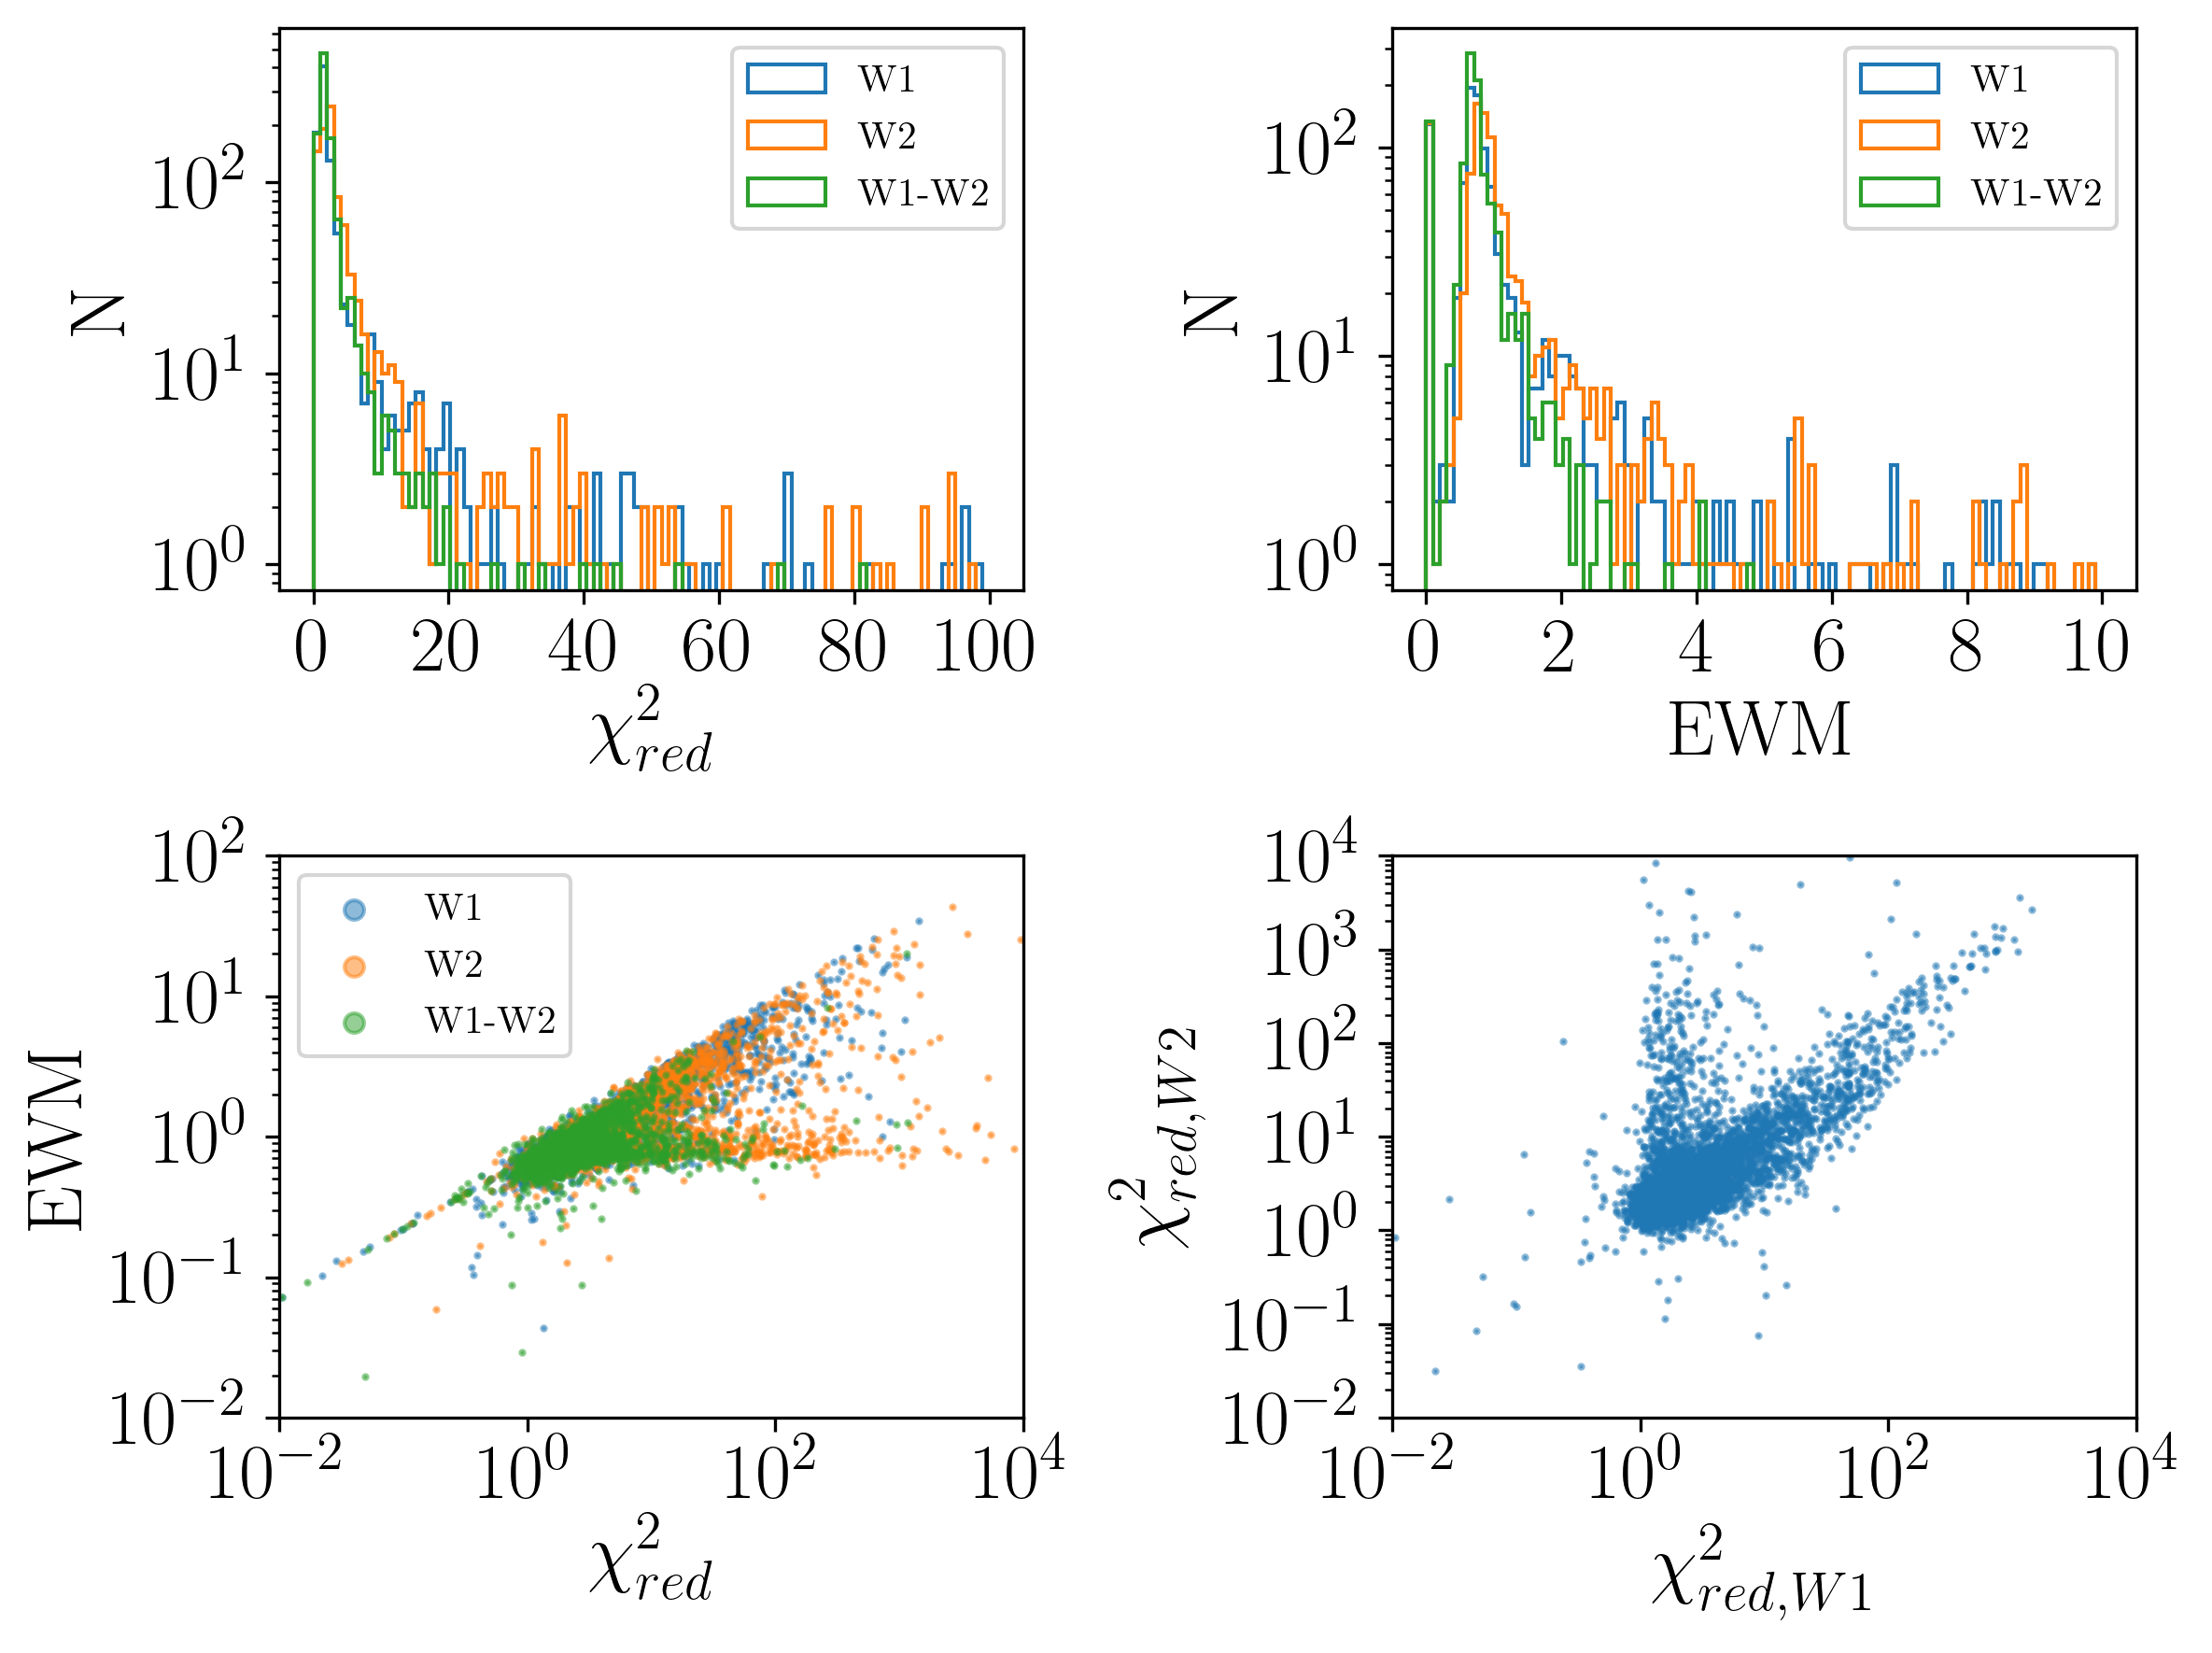

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(8,6),dpi=300)
ax[0,0].hist(joined.dropna()['W1chi2red'],bins=np.linspace(0,100,100),histtype='step',label='W1')
ax[0,0].hist(joined.dropna()['W2chi2red'],bins=np.linspace(0,100,100),histtype='step',label='W2')
ax[0,0].hist(joined.dropna()['W1-W2chi2red'],bins=np.linspace(0,100,100),histtype='step',label='W1-W2')
ax[0,0].set(yscale='log',xlabel=r'$\chi^2_{red}$',ylabel='N')

ax[0,1].hist(joined.dropna()['W1_EWM'],bins=np.linspace(0,10,100),histtype='step',label='W1')
ax[0,1].hist(joined.dropna()['W2_EWM'],bins=np.linspace(0,10,100),histtype='step',label='W2')
ax[0,1].hist(joined.dropna()['W1-W2_EWM'],bins=np.linspace(0,10,100),histtype='step',label='W1-W2')
ax[0,1].set(yscale='log',xlabel=r'EWM',ylabel='N')

ax[1,0].scatter(joined['W1chi2red'],joined['W1_EWM'],s=1,alpha=0.5,label='W1')
ax[1,0].scatter(joined['W2chi2red'],joined['W2_EWM'],s=1,alpha=0.5,label='W2')
ax[1,0].scatter(joined['W1-W2chi2red'],joined['W1-W2_EWM'],s=1,alpha=0.5,label='W1-W2')
ax[1,0].set(xscale='log',yscale='log',xlabel=r'$\chi^2_{red}$',ylabel=r'EWM',xlim=(1e-2,10000),ylim=(1e-2,100))

ax[1,1].scatter(joined['W1chi2red'],joined['W2chi2red'],s=1,alpha=0.5,label='W1')
ax[1,1].set(xscale='log',yscale='log',xlabel=r'$\chi^2_{red,W1}$',ylabel=r'$\chi^2_{red,W2}$',xlim=(1e-2,10000),ylim=(1e-2,10000))

for a in ax.flatten():
    if a != ax.flatten()[-1]:
        a.legend(markerscale=5)
    a.xaxis.label.set_size(20)
    a.yaxis.label.set_size(20)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        
plt.tight_layout()
plt.savefig('../plots/chi_ewm.pdf')

98


"top = flarey.iloc[2]\nwise_id = top['WISE_Designation']\nlc = get_lightcurve(wise_id,lightcurve_directory)\nfig,ax = plt.subplots(2,1,figsize=(12,6),dpi=300,sharex=True)\ntwax = ax[0].twinx()\nN = len(lc)\nchi2 = np.sum(((lc['w1w2'].values - np.median(lc['w1w2'].values))**2.0)/(lc['w1w2err'].values**2.0))\nredchi2 = chi2/(N-1.0)\nMAD = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values)))\nEWM = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values))/lc['w1w2err'].values)\nax[0].errorbar(lc['mjd'],lc['w1mpro'],yerr=lc['w1sigmpro'],c='C0',ls='',label='W1')\ntwax.errorbar(lc['mjd'],lc['w2mpro'],yerr=lc['w2sigmpro'],c='C1',ls='',label='W2')\ntwax.set_yticks([])\nax[1].errorbar(lc['mjd'],lc['w1w2'],yerr=lc['w1w2err'],c='C2',ls='',label='W1-W2')\nh1, l1 = ax[0].get_legend_handles_labels()\nh2, l2 = twax.get_legend_handles_labels()\nh3, l3 = ax[1].get_legend_handles_labels()\nax[0].legend(h1+h2+h3, l1+l2+l3,loc='lower left')\nax[1].set_xlabel('MJD [days]',fontsize=20)\n

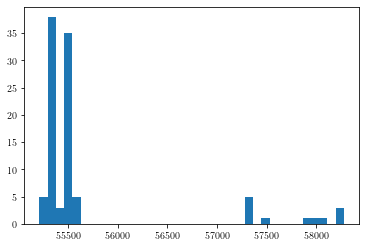

In [49]:
flarey = joined[(joined['W1chi2red'] < 10) & (joined['W2chi2red'] > 100)].reset_index(drop=True)
print(len(flarey))
maxes = []
for i,row in flarey.iterrows():
    lc = get_lightcurve(row['WISE_Designation'],lightcurve_directory).reset_index(drop=True)
    max_ind = np.argmax(lc['w1w2'])
    maxes.append(lc.iloc[max_ind]['mjd'])
    chi2 = np.sum(((lc['w2mpro'].values - np.median(lc['w2mpro'].values))**2.0)/(lc['w2sigmpro'].values**2.0))
    redchi2 = chi2/(N-1.0)
    EWM = np.median(np.abs(lc['w2mpro'].values-np.median(lc['w2mpro'].values))/lc['w2sigmpro'].values)
    #print(redchi2,EWM)
plt.hist(maxes,bins='auto')
"""top = flarey.iloc[2]
wise_id = top['WISE_Designation']
lc = get_lightcurve(wise_id,lightcurve_directory)
fig,ax = plt.subplots(2,1,figsize=(12,6),dpi=300,sharex=True)
twax = ax[0].twinx()
N = len(lc)
chi2 = np.sum(((lc['w1w2'].values - np.median(lc['w1w2'].values))**2.0)/(lc['w1w2err'].values**2.0))
redchi2 = chi2/(N-1.0)
MAD = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values)))
EWM = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values))/lc['w1w2err'].values)
ax[0].errorbar(lc['mjd'],lc['w1mpro'],yerr=lc['w1sigmpro'],c='C0',ls='',label='W1')
twax.errorbar(lc['mjd'],lc['w2mpro'],yerr=lc['w2sigmpro'],c='C1',ls='',label='W2')
twax.set_yticks([])
ax[1].errorbar(lc['mjd'],lc['w1w2'],yerr=lc['w1w2err'],c='C2',ls='',label='W1-W2')
h1, l1 = ax[0].get_legend_handles_labels()
h2, l2 = twax.get_legend_handles_labels()
h3, l3 = ax[1].get_legend_handles_labels()
ax[0].legend(h1+h2+h3, l1+l2+l3,loc='lower left')
ax[1].set_xlabel('MJD [days]',fontsize=20)
ax[0].set_ylabel('W1, W2 [mag]', fontsize=20)
ax[0].set_title(f'WISE {wise_id}', fontsize=20)
ax[1].set_ylabel('W1-W2 [mag]',fontsize=20)
for a in ax:
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
for tick in twax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)"""

[None,
 (0.01, 10000),
 Text(0, 0.5, '$\\chi^2_{red,W2}$'),
 None,
 (0.01, 10000),
 Text(0.5, 0, '$\\chi^2_{red,W1}$')]

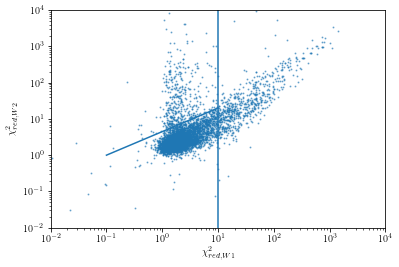

In [57]:
plt.scatter(joined['W1chi2red'],joined['W2chi2red'],s=1,alpha=0.5,label='W1')
plt.axvline(x=10)
plt.plot([0.1,10],[1,20])
plt.gca().set(xscale='log',yscale='log',xlabel=r'$\chi^2_{red,W1}$',ylabel=r'$\chi^2_{red,W2}$',xlim=(1e-2,10000),ylim=(1e-2,10000))

In [78]:
slope = 10.0/0.9
intercept = 0.8

(array(['C/S/Giant', 'EvolvedOBA', 'MainSequenceOBA', 'Misc. Variable',
        'OBA', 'OBAe', 'RSG', 'SupergiantOBA', 'Unknown/Candidate', 'WR',
        'YSG'], dtype=object),
 array([  2,   6,   6,  20,  18,   5,  12,  47, 101,   1,   4]))

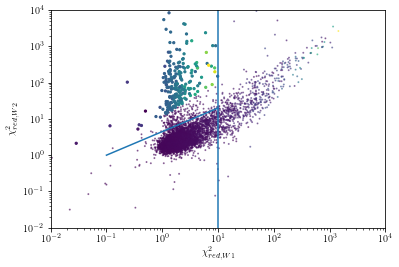

In [88]:
weird = joined[(joined['W1chi2red']<10)&(joined['W2chi2red'] >= slope*joined['W1chi2red'] + intercept)]
plt.scatter(joined['W1chi2red'],joined['W2chi2red'],s=1,c=joined['W1_EWM'],alpha=0.5)
plt.scatter(weird['W1chi2red'],weird['W2chi2red'],s=5,c=weird['W1_EWM'])
plt.axvline(x=10)
plt.plot([0.1,10],[1,20])
plt.gca().set(xscale='log',yscale='log',xlabel=r'$\chi^2_{red,W1}$',ylabel=r'$\chi^2_{red,W2}$',xlim=(1e-2,10000),ylim=(1e-2,10000))
np.unique(weird['Class'].values,return_counts=True)

/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([0.09589617, 0.04794808, 0.        , 0.        , 0.        ,
        0.09589617, 0.        , 0.09589617, 0.09589617, 0.09589617,
        0.2876885 , 0.575377  , 0.8630655 , 1.77407909, 1.63023484,
        1.77407909, 0.91101359, 0.47948084, 0.19179233, 0.33563658,
        0.14384425, 0.09589617, 0.23974042, 0.14384425, 0.        ,
        0.        , 0.04794808, 0.04794808, 0.09589617, 0.04794808,
        0.04794808, 0.        , 0.        , 0.        , 0.        ,
        0.04794808, 0.09589617, 0.        , 0.09589617, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04794808, 0.        , 0.        , 0.        ,
        0.        , 0.04794808, 0.        , 0.        , 0.04794808]),
 array([-1.251     , -1.15705455, -1.06310909, -0.96916364, -0.87521818,
        -0.78127273, -0.68732727, -0.59338182, -0.49943636, -0.40549091,
        -0.31154545, -0.2176    , -0.12365455, -0.02970909,  0.06423636,
         0.15818182,  0.2521272

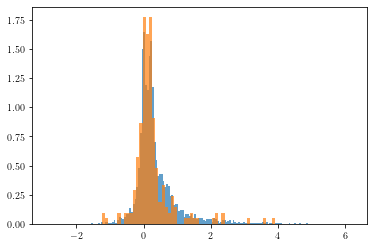

In [104]:
plt.hist(joined['W2-W3'],bins='auto',normed=True,alpha=0.7)
plt.hist(weird['W2-W3'],bins='auto',normed=True,alpha=0.7)


Text(0, 0.5, 'EWM$_{\\rm W2}$')

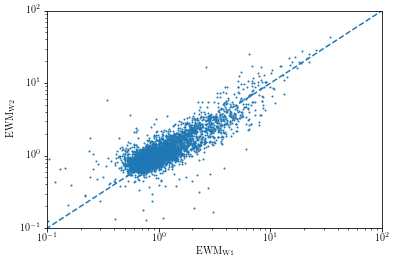

In [10]:
plt.plot([0,100],[0,100],ls='--')
plt.scatter(variability_df['W1_EWM'],variability_df['W2_EWM'],s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,100)
plt.ylim(1e-1,100)
plt.xlabel(r'EWM$_{\rm W1}$')
plt.ylabel(r'EWM$_{\rm W2}$')

In [105]:
def cdf(array, norm=True):
    """
    Calculates the cumulative density function of a given array. Default behavior is to
    normalize the CDF for easy comparison between arrays of different sizes
    
    Parameters
    ----------
    array : array-like
        Array to calculate CDF of
        
    norm : bool
        Whether to normalize by the size of array. Default True.
    
    Returns
    -------
    vals : array-like
        Abcissa of density
    density : array-like
        Values of CDF
    
    """
    
    vals = np.sort(array[~np.isnan(array)])
    
    density = np.array([i+1 for i in range(len(vals))])
    
    if norm:
        density = density/len(vals)
        
    mean_dif = np.mean(np.diff(vals))
    
    vals = np.insert(vals, 0, np.min([0,vals[0]-mean_dif]))
    density = np.insert(density, 0, 0)
        
    return vals, density

Text(0, 0.5, 'CDF')

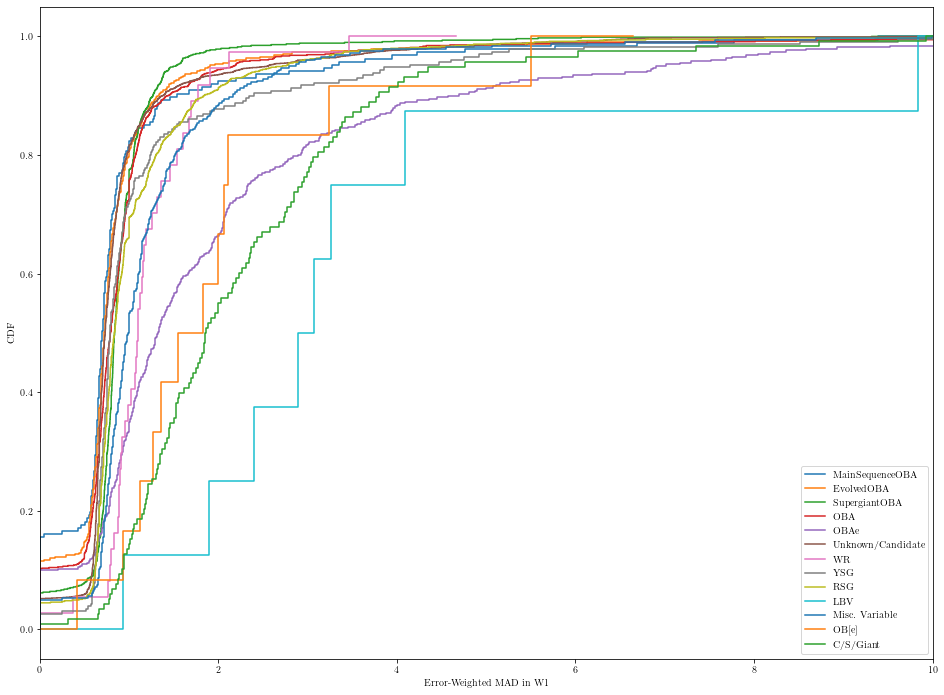

In [106]:
fig = plt.figure(figsize=(16,12))
for i,cl in enumerate(joined['Class'].unique()):
    vals, density = cdf(joined['W1_EWM'][joined['Class']==cl].values)
    plt.step(vals,density,where='mid',label=cl)
plt.legend()
plt.xlim(0,10)
plt.xlabel('Error-Weighted MAD in W1')
plt.ylabel('CDF')

Text(0, 0.5, 'CDF')

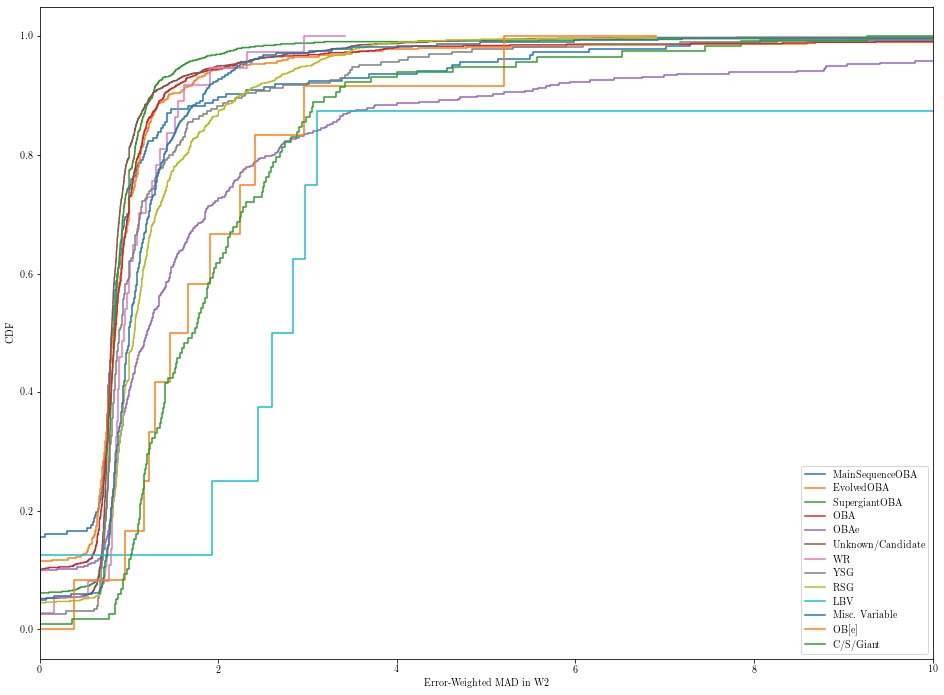

In [16]:
fig = plt.figure(figsize=(16,12))
for i,cl in enumerate(joined['Class'].unique()):
    vals, density = cdf(joined['W2_EWM'][joined['Class']==cl].values)
    plt.step(vals,density,where='mid',label=cl)
plt.legend()
plt.xlim(0,10)
plt.xlabel('Error-Weighted MAD in W2')
plt.ylabel('CDF')

Text(0, 0.5, 'CDF')

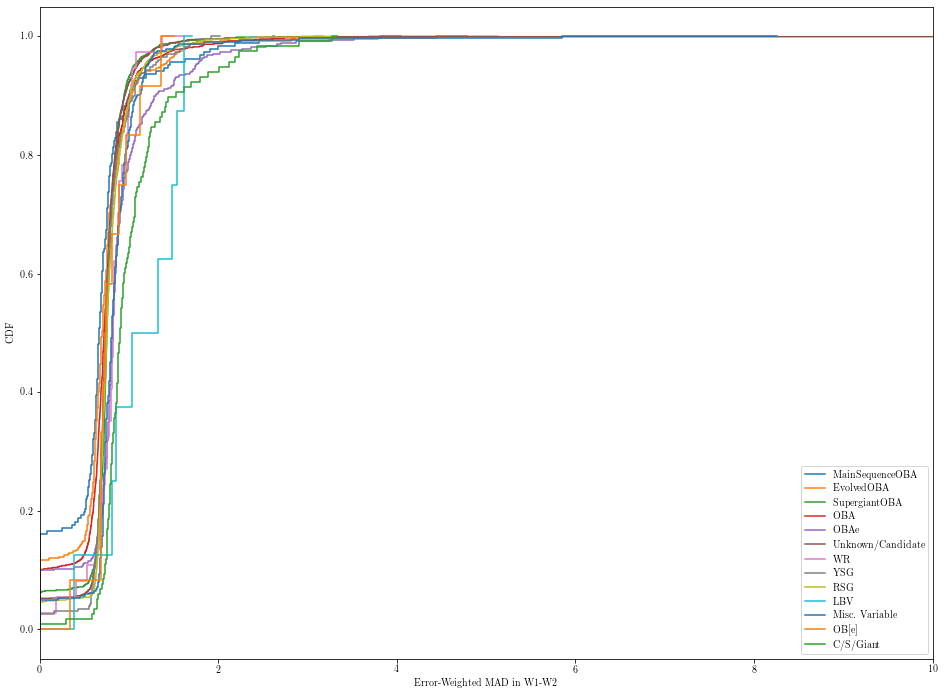

In [17]:
fig = plt.figure(figsize=(16,12))
for i,cl in enumerate(joined['Class'].unique()):
    vals, density = cdf(joined['W1-W2_EWM'][joined['Class']==cl].values)
    plt.step(vals,density,where='mid',label=cl)
plt.legend()
plt.xlim(0,10)
plt.xlabel('Error-Weighted MAD in W1-W2')
plt.ylabel('CDF')